# Titanic Data Analysis

## First Step - look over the data

I am going to look over the given data so that I could brainstorm some interesting questions. My guess on Titanic data is 'survivability'. 
  
- **given data file**: titanic-data.csv
- **libraries**: pandas, numpy, matplotlib

In [66]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

titanic_df = pd.read_csv('titanic-data.csv')

pandas Dataframe has good functions to briefly inspect such as 'head()' or 'describe()'.

In [67]:
titanic_df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


Here, I just displayed one row (record) or the data to find out what columns are available. I think It is very nice approach to inspect only kinds of columns without actual data for brainstorming. I could be overwhelmed if I have to look through all the records at the first time.

Field Explanation (from Kaggle)
- **survival** : Survival (0 = No, 1 = Yes)
- **pclass** : Ticket class (1 = 1st/Upper, 2 = 2nd/Middle, 3 = 3rd/Lower)
- **sex** : Sex
- **Age** : Age in years
- **sibsp** : # of siblings / spouses aboard the Titanic (siblings = brother/sister/stepbrother/stepsister, spouse = husband/wife)
- **parch** : # of parents / children aboard the Titanic (parent = mother/father, child = daughter/son/stepdaughter/stepson)
  - some children travelled only with a nanny, therefore parch=0 for them
- **ticket** : Ticket number
- **fare** : Passenger fare
- **cabin** : Cabin number
- **embarked** : Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

In [68]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Q1. Relationship between Pclass and Survived
### - upper class people tended to be survived with more chance?

In [69]:
mean_survive_by_class = titanic_df.groupby('Pclass')['Survived'].mean()
mean_survive_by_class

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

[<matplotlib.text.Text at 0x1150eff50>, <matplotlib.text.Text at 0x1150f0990>]

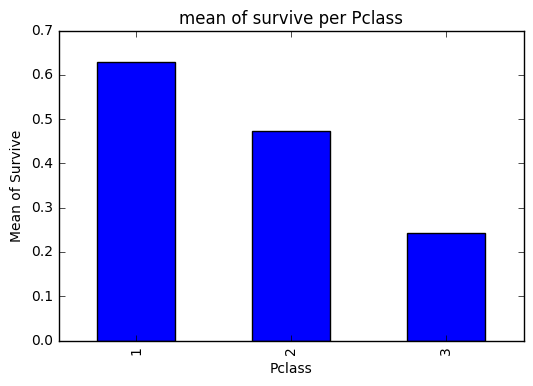

In [70]:
mean_survive_by_class_plot = mean_survive_by_class.plot(kind='bar', title='mean of survive per Pclass', x='a')
mean_survive_by_class_plot.set(xlabel='Pclass', ylabel='Mean of Survive')

Looks like people in higher class had more chance to survive than comparatively lower class. It seems reasonable back in time that rich people could afford better class. 

From the movie, Titanic, However, I remember crews tended to rescue elders, childs, girls in higher priority regardless of their classes. Was the movie telling a lie? or even though they did so in real, rich (high class) could buy off the seats? I am getting curious.

# Q2. Age and sex of people survived in each class
### - elder, youger people had more chance to survive?

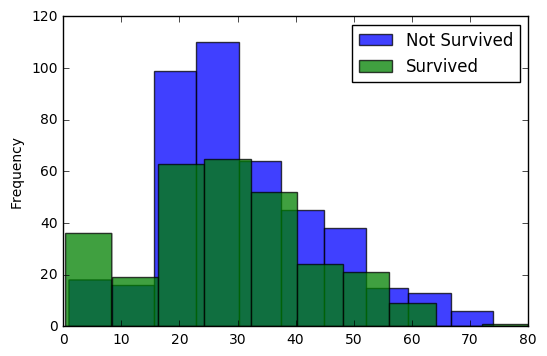

In [72]:
groups = titanic_df.groupby("Survived")["Age"]
fig, ax = plt.subplots()
for k, v in groups:
    if k==0:
        v.plot.hist(label='Not Survived', alpha=.75, ax=ax)
    else:
        v.plot.hist(label='Survived', alpha=.75, ax=ax)
ax.legend()
plt.show()

### - female had more chance to survive over man?

### - people in higher class luckily include more population of elder, child, and femail?